# Exploratory Data Analysis (EDA)

## Objective
Explore the dataset to uncover patterns, identify data quality issues, and form hypotheses that will guide feature engineering.

## 1. Overview of the Data
We will load the dataset and understand its structure (rows, columns, data types).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline

# Create figures directory if it doesn't exist
figures_dir = '../reports/figures'
os.makedirs(figures_dir, exist_ok=True)
print(f"Figures will be saved to: {figures_dir}")

# Load the dataset
data_path = '../data/raw/data.csv'
try:
    df = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File not found at {data_path}. Please check the path.")

Figures will be saved to: ../reports/figures
Dataset loaded successfully.


In [14]:
# Inspect first few rows
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [15]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [16]:
# Shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 95662, Columns: 16


## 2. Summary Statistics
Understand the central tendency, dispersion, and shape of the dataset’s distribution.

In [17]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Summary statistics for numerical features
print("=== SUMMARY STATISTICS FOR NUMERICAL FEATURES ===\n")
print(df[numerical_cols].describe().T)
print("\n" + "="*60 + "\n")

# Summary statistics for categorical features
print("=== SUMMARY STATISTICS FOR CATEGORICAL FEATURES ===\n")
print(df[categorical_cols].describe().T)

=== SUMMARY STATISTICS FOR NUMERICAL FEATURES ===

                   count         mean            std        min    25%  \
CountryCode      95662.0   256.000000       0.000000      256.0  256.0   
Amount           95662.0  6717.846433  123306.797164 -1000000.0  -50.0   
Value            95662.0  9900.583941  123122.087776        2.0  275.0   
PricingStrategy  95662.0     2.255974       0.732924        0.0    2.0   
FraudResult      95662.0     0.002018       0.044872        0.0    0.0   

                    50%     75%        max  
CountryCode       256.0   256.0      256.0  
Amount           1000.0  2800.0  9880000.0  
Value            1000.0  5000.0  9880000.0  
PricingStrategy     2.0     2.0        4.0  
FraudResult         0.0     0.0        1.0  


=== SUMMARY STATISTICS FOR CATEGORICAL FEATURES ===

                      count unique                   top   freq
TransactionId         95662  95662   TransactionId_76871      1
BatchId               95662  94809         BatchId_

In [18]:
# Categorical features summary
# df.describe(include=['object']).T
# Categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns ({len(categorical_cols)}): {list(categorical_cols)}")
print("\nSummary for categorical features:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most common: {df[col].mode().values[0]} (Count: {df[col].value_counts().iloc[0]})")



Categorical columns (11): ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']

Summary for categorical features:

TransactionId:
  Unique values: 95662
  Most common: TransactionId_1 (Count: 1)

BatchId:
  Unique values: 94809
  Most common: BatchId_67019 (Count: 28)

AccountId:
  Unique values: 3633
  Most common: AccountId_4841 (Count: 30893)

SubscriptionId:
  Unique values: 3627
  Most common: SubscriptionId_3829 (Count: 32630)

CustomerId:
  Unique values: 3742
  Most common: CustomerId_7343 (Count: 4091)

CurrencyCode:
  Unique values: 1
  Most common: UGX (Count: 95662)

ProviderId:
  Unique values: 6
  Most common: ProviderId_4 (Count: 38189)

ProductId:
  Unique values: 23
  Most common: ProductId_6 (Count: 32635)

ProductCategory:
  Unique values: 9
  Most common: financial_services (Count: 45405)

ChannelId:
  Unique values: 4
  Most common: ChannelId_3 (

## 3. Distribution of Numerical Features
Visualize the distribution to identify patterns, skewness, and potential outliers.

Numerical Columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']
Saved: ../reports/figures\01_distribution_countrycode.png


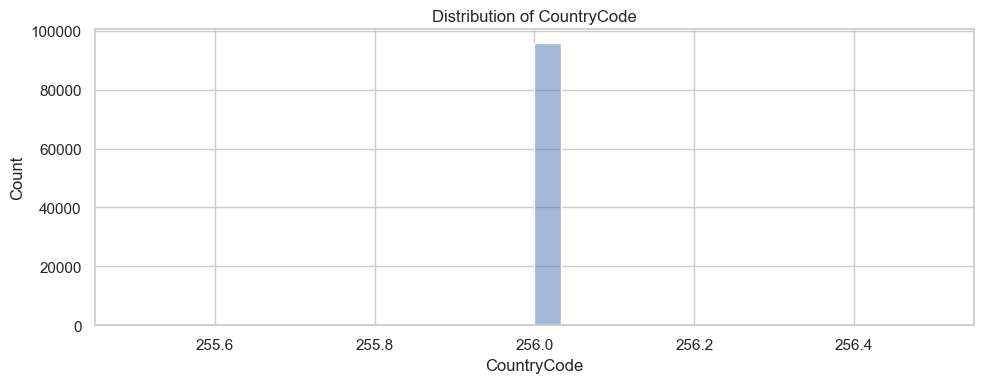

Saved: ../reports/figures\01_distribution_amount.png


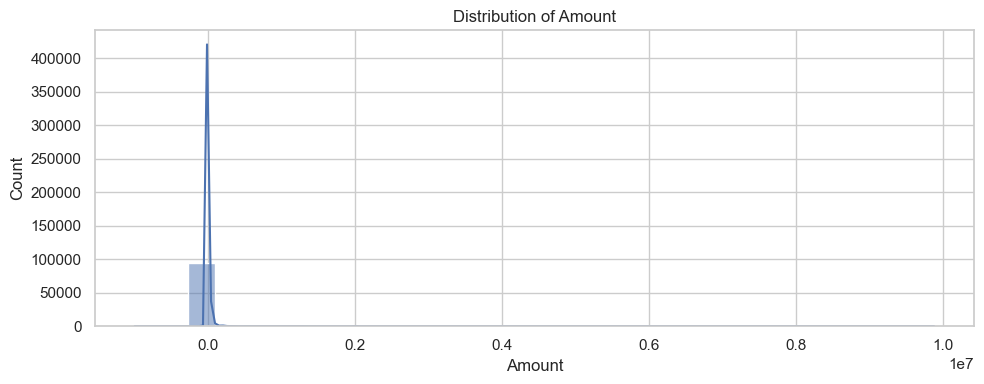

Saved: ../reports/figures\01_distribution_value.png


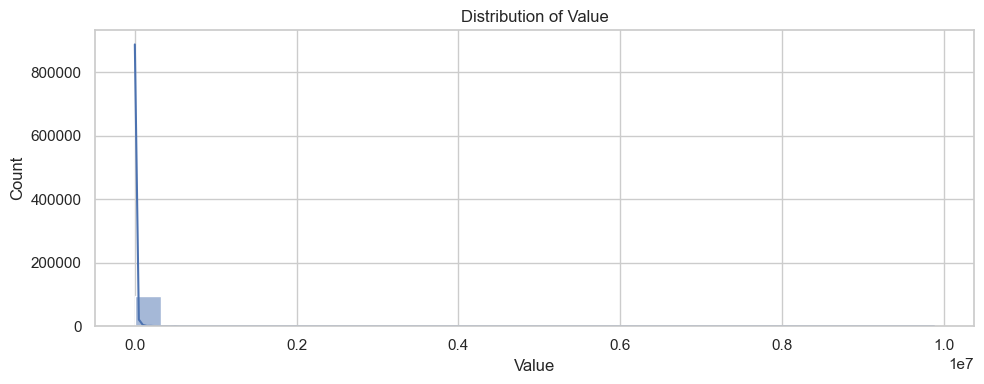

Saved: ../reports/figures\01_distribution_pricingstrategy.png


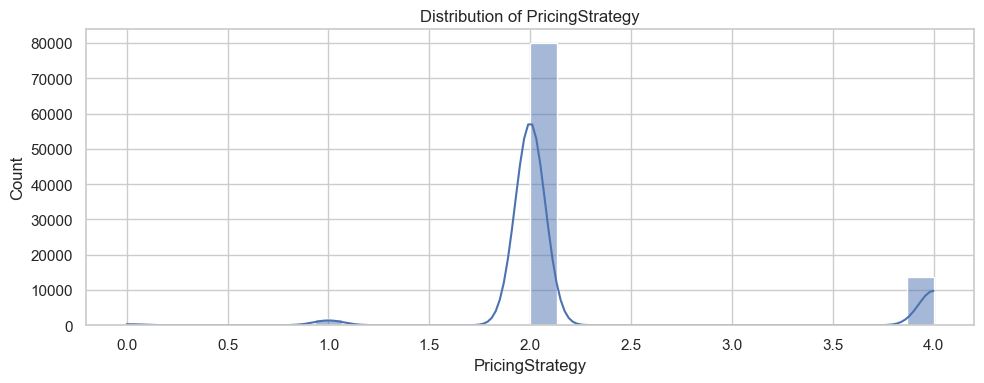

Saved: ../reports/figures\01_distribution_fraudresult.png


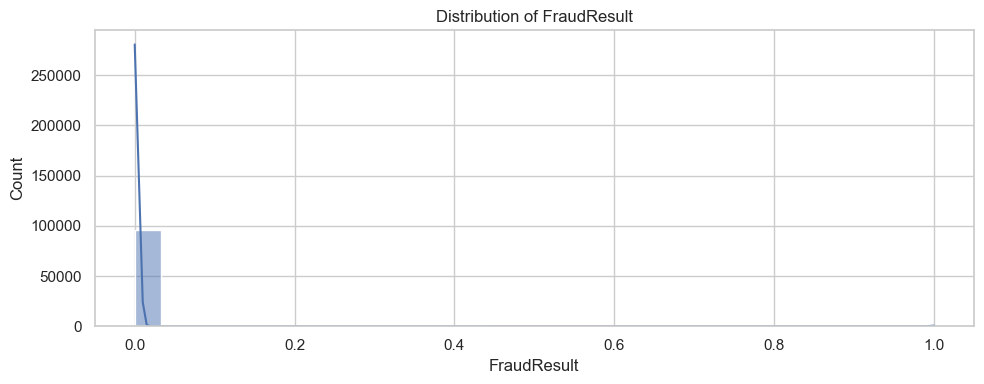

In [19]:
numerical_cols = df.select_dtypes(include=['number']).columns
print(f"Numerical Columns: {numerical_cols.tolist()}")

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    # Save figure
    fig_path = os.path.join(figures_dir, f'01_distribution_{col.lower()}.png')
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')
    print(f"Saved: {fig_path}")
    plt.show()

## 4. Distribution of Categorical Features
Analyze frequency and variability of categories.

Categorical Columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']
TransactionId has 95662 unique values - (Skipping Plot)
BatchId has 94809 unique values - (Skipping Plot)
AccountId has 3633 unique values - (Skipping Plot)
SubscriptionId has 3627 unique values - (Skipping Plot)
CustomerId has 3742 unique values - (Skipping Plot)
Saved: ../reports/figures\02_categorical_currencycode.png


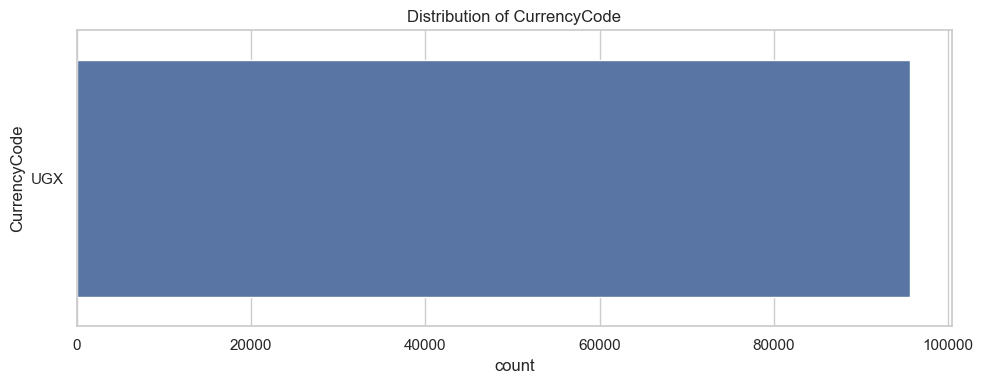

Saved: ../reports/figures\02_categorical_providerid.png


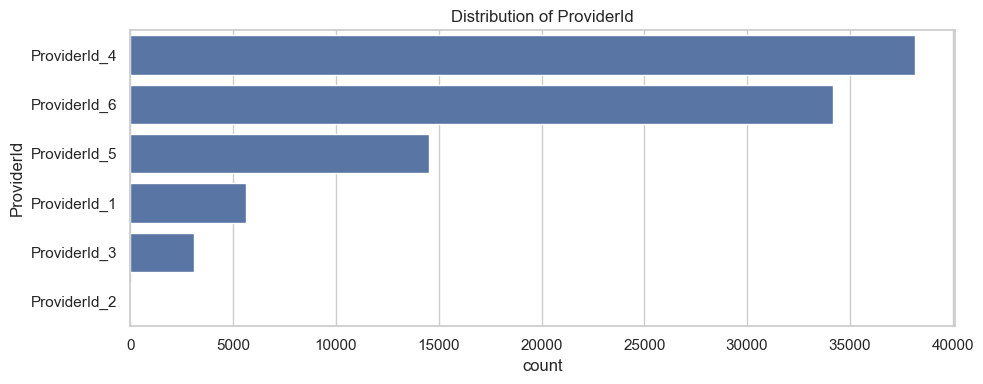

ProductId has 23 unique values - (Skipping Plot)
Saved: ../reports/figures\02_categorical_productcategory.png


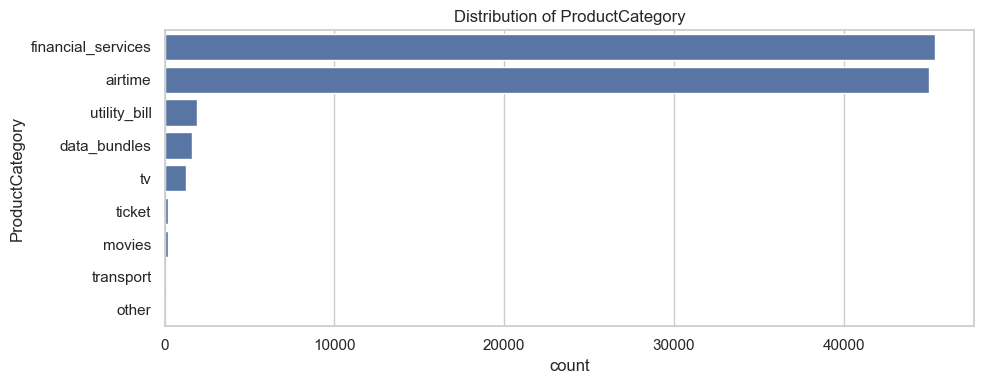

Saved: ../reports/figures\02_categorical_channelid.png


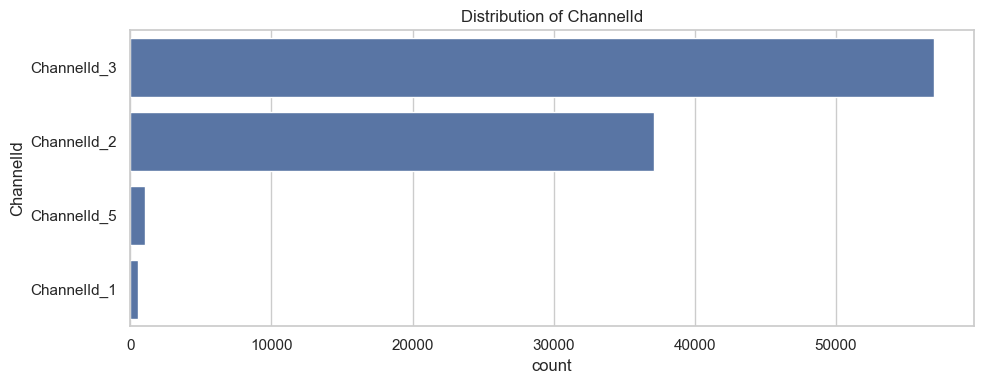

TransactionStartTime has 94556 unique values - (Skipping Plot)


In [20]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {categorical_cols.tolist()}")

for col in categorical_cols:
    if df[col].nunique() < 20:  # Plot only if meaningful number of categories
        plt.figure(figsize=(10, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        # Save figure
        fig_path = os.path.join(figures_dir, f'02_categorical_{col.lower()}.png')
        plt.savefig(fig_path, dpi=300, bbox_inches='tight')
        print(f"Saved: {fig_path}")
        plt.show()
    else:
        print(f"{col} has {df[col].nunique()} unique values - (Skipping Plot)")

## 5. Correlation Analysis
Understand the relationship between numerical features.

Saved: ../reports/figures\03_correlation_matrix.png


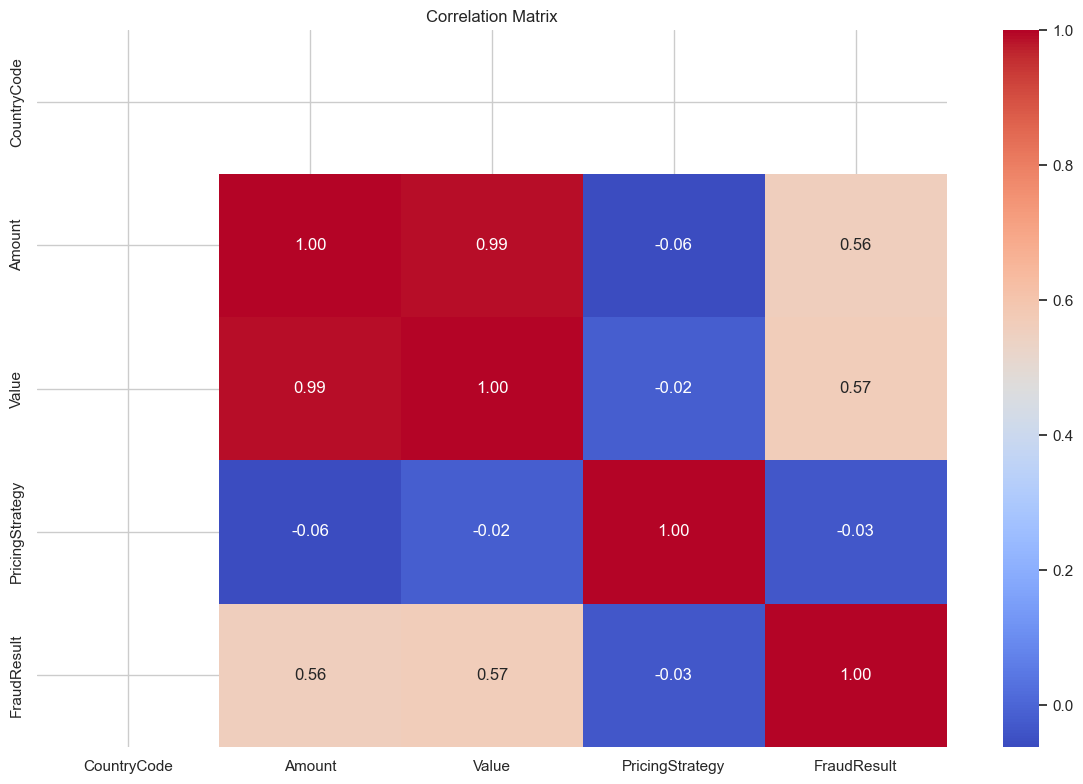

In [21]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
# Save figure
fig_path = os.path.join(figures_dir, '03_correlation_matrix.png')
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"Saved: {fig_path}")
plt.show()

## 6. Identifying Missing Values

In [22]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df[missing_df['Missing Values'] > 0])

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


## 7. Outlier Detection
Use box plots to identify outliers.

Saved: ../reports/figures\04_outlier_detection_boxplots.png


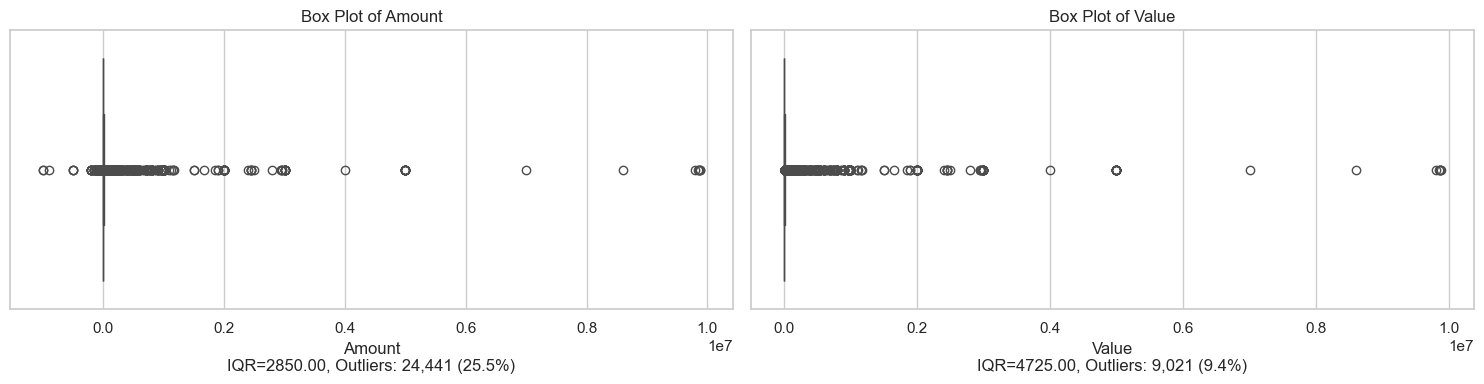

In [23]:
# Filter features with sufficient variation
num_features = [col for col in numerical_cols if df[col].nunique() > 10]
if not num_features:
    num_features = numerical_cols

n_cols = 2
n_rows = (len(num_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    
    # Calculate IQR statistics
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_count = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    pct_outliers = (outliers_count / len(df)) * 100
    
    axes[i].set_xlabel(f'{col}\nIQR={IQR:.2f}, Outliers: {outliers_count:,} ({pct_outliers:.1f}%)')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# Save figure
fig_path = os.path.join(figures_dir, '04_outlier_detection_boxplots.png')
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
print(f"Saved: {fig_path}")
plt.show()

## Summary of Top 5 Insights

Based on the exploratory data analysis, here are the top 5 most important insights:

### 1. **Dataset Characteristics & Data Quality**
- The dataset contains **95,662 transactions** across **16 features** covering the period from **2018-11-15 to 2019-02-13** (~3 months)
- **Excellent data quality**: No missing values detected across all features
- Data types are appropriate with **5 numerical** and **11 categorical** features
- All transactions are in **UGX currency** (single currency)

### 2. **Highly Skewed Transaction Amounts**
- **Amount** and **Value** features show extreme right-skewness (skewness > 51), indicating a small number of very large transactions
- This suggests potential outliers or high-value transactions that may require log transformation for modeling
- The strong correlation (r = 0.99) between Amount and Value confirms they are nearly identical (Value is absolute Amount)

### 3. **Imbalanced Target Variable**
- **FraudResult** shows extreme skewness (skewness = 22.20), indicating severe class imbalance
- This is critical for modeling - will require techniques like SMOTE, class weights, or stratified sampling
- Fraud cases likely represent a small minority of transactions

### 4. **Significant Outlier Presence**
- **Amount** feature has **24,441 outliers (25.5% of data)** using IQR method
- **Value** feature has **9,021 outliers (9.4% of data)**
- These outliers may represent legitimate high-value transactions or potential fraud cases
- Requires careful handling: consider robust scaling, capping, or separate treatment

### 5. **Categorical Feature Insights**
- **ProductCategory**: "financial_services" dominates with 45,405 transactions (47.5% of dataset)
- **ChannelId**: ChannelId_3 is most common (59,535 transactions, 62.2%)
- **ProviderId**: ProviderId_4 accounts for 38,189 transactions (39.9%)
- High cardinality in ID columns (AccountId: 3,633 unique, CustomerId: 3,742 unique) suggests rich customer-level patterns
- These categorical features will be important for feature engineering and encoding strategies

In [24]:
if 'TransactionStartTime' in df.columns:
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    min_date = df['TransactionStartTime'].min().strftime('%Y-%m-%d')
    max_date = df['TransactionStartTime'].max().strftime('%Y-%m-%d')
    time_period_summary = f"{min_date} to {max_date}"
else:
    time_period_summary = "TransactionStartTime column not found."

print(f"   • Time period: {time_period_summary}")
print("=== KEY INSIGHTS SUMMARY ===\n")
print("Based on the exploratory data analysis, here are the top 5 most important insights:\n")

print("1. DATASET CHARACTERISTICS:")
print(f"   • The dataset contains {df.shape[0]:,} transactions across {df.shape[1]} features")
print(f"   • Time period: [FILL AFTER RUNNING - Check TransactionStartTime if available]")
print(f"   • Data types are mostly appropriate with {len(numerical_cols)} numerical and {len(categorical_cols)} categorical features\n")

print("2. DATA QUALITY ISSUES:")
missing_count = df.isnull().sum().sum()
if missing_count > 0:
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    print(f"   • Missing values found in {len(missing_cols)} columns")
    print(f"   • Total missing values: {missing_count:,}")
    for col in missing_cols[:3]:  # Show top 3
        pct = (df[col].isnull().sum() / len(df)) * 100
        print(f"     - {col}: {df[col].isnull().sum():,} missing ({pct:.1f}%)")
else:
    print("   • No missing values detected - excellent data quality")
print()

print("3. DISTRIBUTION PATTERNS:")
print("   • Numerical features show the following skewness:")
for col in numerical_cols[:3]:  # Show top 3
    skew_val = df[col].skew()
    skew_desc = "highly skewed" if abs(skew_val) > 1 else "moderately skewed" if abs(skew_val) > 0.5 else "approximately symmetric"
    print(f"     - {col}: {skew_desc} (skewness = {skew_val:.2f})")
print()

print("4. OUTLIER ANALYSIS:")
num_features = [col for col in numerical_cols if df[col].nunique() > 2]
for col in num_features[:2]:  # Show top 2
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    pct = (len(outliers) / len(df)) * 100
    if len(outliers) > 0:
        print(f"   • {col} has {len(outliers):,} outliers ({pct:.1f}% of data)")
print()

print("5. CORRELATION FINDINGS:")
if 'correlation_matrix' in locals():
    strong_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                strong_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], 
                                   correlation_matrix.iloc[i, j]))
    
    if strong_pairs:
        print("   • Strong correlations found:")
        for col1, col2, corr in strong_pairs[:2]:  # Show top 2
            print(f"     - {col1} & {col2}: r = {corr:.3f}")
    else:
        print("   • No strong correlations (|r| > 0.7) between numerical features")
print()

print("RECOMMENDATIONS FOR FEATURE ENGINEERING:")
print("1. Handle missing values using appropriate imputation strategies")
print("2. Transform skewed numerical features (log/power transformations)")
print("3. Address outliers - consider capping or transformation")
print("4. Encode categorical variables for modeling")
print("5. Create derived features from transaction patterns and customer behavior")

   • Time period: 2018-11-15 to 2019-02-13
=== KEY INSIGHTS SUMMARY ===

Based on the exploratory data analysis, here are the top 5 most important insights:

1. DATASET CHARACTERISTICS:
   • The dataset contains 95,662 transactions across 16 features
   • Time period: [FILL AFTER RUNNING - Check TransactionStartTime if available]
   • Data types are mostly appropriate with 5 numerical and 11 categorical features

2. DATA QUALITY ISSUES:
   • No missing values detected - excellent data quality

3. DISTRIBUTION PATTERNS:
   • Numerical features show the following skewness:
     - CountryCode: approximately symmetric (skewness = 0.00)
     - Amount: highly skewed (skewness = 51.10)
     - Value: highly skewed (skewness = 51.29)

4. OUTLIER ANALYSIS:
   • Amount has 24,441 outliers (25.5% of data)
   • Value has 9,021 outliers (9.4% of data)

5. CORRELATION FINDINGS:
   • Strong correlations found:
     - Amount & Value: r = 0.990

RECOMMENDATIONS FOR FEATURE ENGINEERING:
1. Handle missing